# Data 620 - Web Analytics HW 4.2

**Yina Qiao**
<br><br>video link:

Assignment:

Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

### Data:
"The Adventures of Huckleberry Finn" by Mark Twain
https://www.gutenberg.org/files/76/76-0.txt

# Data Import and Wrangling

In [15]:
import urllib.request
import re
import nltk
import string
import matplotlib.pyplot as plt

# Download the WordNet corpus
nltk.download('wordnet')

url = "https://www.gutenberg.org/files/76/76-0.txt"
response = urllib.request.urlopen(url)
raw = response.read().decode('utf-8')
raw = raw.encode('ascii', 'ignore').decode('utf-8')

print("Starting Point:", raw.rfind("*** START OF THIS PROJECT GUTENBERG EBOOK HUCKLEBERRY FINN ***"))
print("Stopping Point:", raw.rfind("*** END OF THE PROJECT GUTENBERG EBOOK ADVENTURES OF HUCKLEBERRY FINN ***"))

# Extract the desired portion of the text
raw = raw[0:574069]

pattern = r'\w{3,}'  # Define a regex pattern to match words with at least 3 characters
tokens = nltk.regexp_tokenize(raw, pattern)  # Tokenize the text using the regex pattern
text = nltk.Text(tokens)  # Create an NLTK Text object from the tokens
print(text[:10])  # Print the first 10 tokens

text = [word.lower() for word in text]  # Convert all words to lowercase
print(text[:10])  # Print the first 10 lowercase words

wnl = nltk.WordNetLemmatizer()  # Create a WordNet lemmatizer object
text = [wnl.lemmatize(t) for t in text]  # Lemmatize each word in the text
print(text[:10])  # Print the first 10 lemmatized words


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Starting Point: -1
Stopping Point: 574069
['The', 'Project', 'Gutenberg', 'eBook', 'Adventures', 'Huckleberry', 'Finn', 'Mark', 'Twain', 'Samuel']
['the', 'project', 'gutenberg', 'ebook', 'adventures', 'huckleberry', 'finn', 'mark', 'twain', 'samuel']
['the', 'project', 'gutenberg', 'ebook', 'adventure', 'huckleberry', 'finn', 'mark', 'twain', 'samuel']


# How many total unique words are in the corpus?

In [24]:
uniqueWords = len(set(text))  # Calculate the number of unique words in the text
print("UniqueWords:", uniqueWords)  # Print the number of unique words

UniqueWords: 6663


# Taking the most common words, how many unique words represent half of the total words in the corpus?

In [25]:
allwords = float(len(text))  # Calculate the total number of words in the text
print("Lexical Diversity:", len(set(text)) / allwords)  # Calculate and print the lexical diversity
print("Number of Words in Corpus:", allwords)  # Print the total number of words in the corpus


Lexical Diversity: 0.07744792635298493
Number of Words in Corpus: 86032.0


# Identify the 200 highest frequency words in this corpus.

  1   7.27% and
  2  12.96% the
  3  15.33% wa
  4  16.84% you
  5  18.07% that
  6  19.25% but
  7  20.23% for
  8  21.20% all
  9  22.16% say
 10  23.11% out
 11  23.94% him
 12  24.75% they
 13  25.47% there
 14  26.18% got
 15  26.86% then
 16  27.50% his
 17  28.12% with
 18  28.71% them
 19  29.29% she
 20  29.85% down
 21  30.41% said
 22  30.96% see
 23  31.49% come
 24  32.02% had
 25  32.53% well
 26  33.03% when
 27  33.52% about
 28  33.99% what
 29  34.46% one
 30  34.93% would
 31  35.35% time
 32  35.76% her
 33  36.16% get
 34  36.56% jim
 35  36.95% didnt
 36  37.34% dont
 37  37.69% way
 38  38.04% could
 39  38.39% right
 40  38.73% went
 41  39.06% warnt
 42  39.40% good
 43  39.73% aint
 44  40.06% over
 45  40.39% off
 46  40.70% like
 47  41.01% old
 48  41.32% know
 49  41.62% around
 50  41.92% just
 51  42.22% thing
 52  42.51% this
 53  42.78% now
 54  43.06% tom
 55  43.33% along
 56  43.59% back
 57  43.85% done
 58  44.11% it
 59  44.36% man
 60  44.61% be

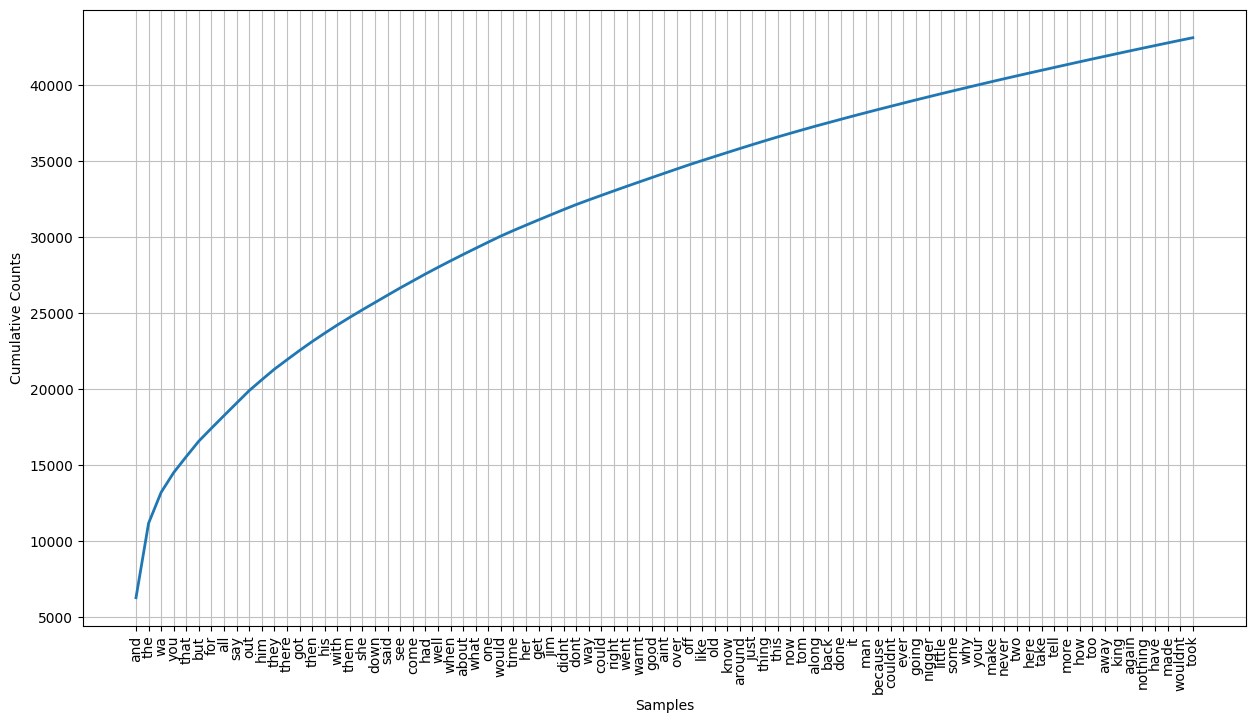

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [27]:
huckFreq = nltk.FreqDist(text)  # Calculate the frequency distribution of words
top200 = huckFreq.most_common(200)  # Get the 200 most common words

cumulative = 0.0
for rank, word in enumerate(top200):  # Iterate over the top 200 words
    cumulative += word[1] * 100 / allwords  # Calculate the cumulative percentage of the words
    print("%3d %6.2f%% %s" % (rank+1, cumulative, word[0]))  # Print the rank, cumulative percentage, and word
    if cumulative > 50:  # Break the loop when cumulative percentage exceeds 50
        break

plt.figure(figsize=(15, 8))  # Set the figure size for the plot
huckFreq.plot(85, cumulative=True)  # Plot the word frequency

# Create a graph that shows the relative frequency of these 200 words.

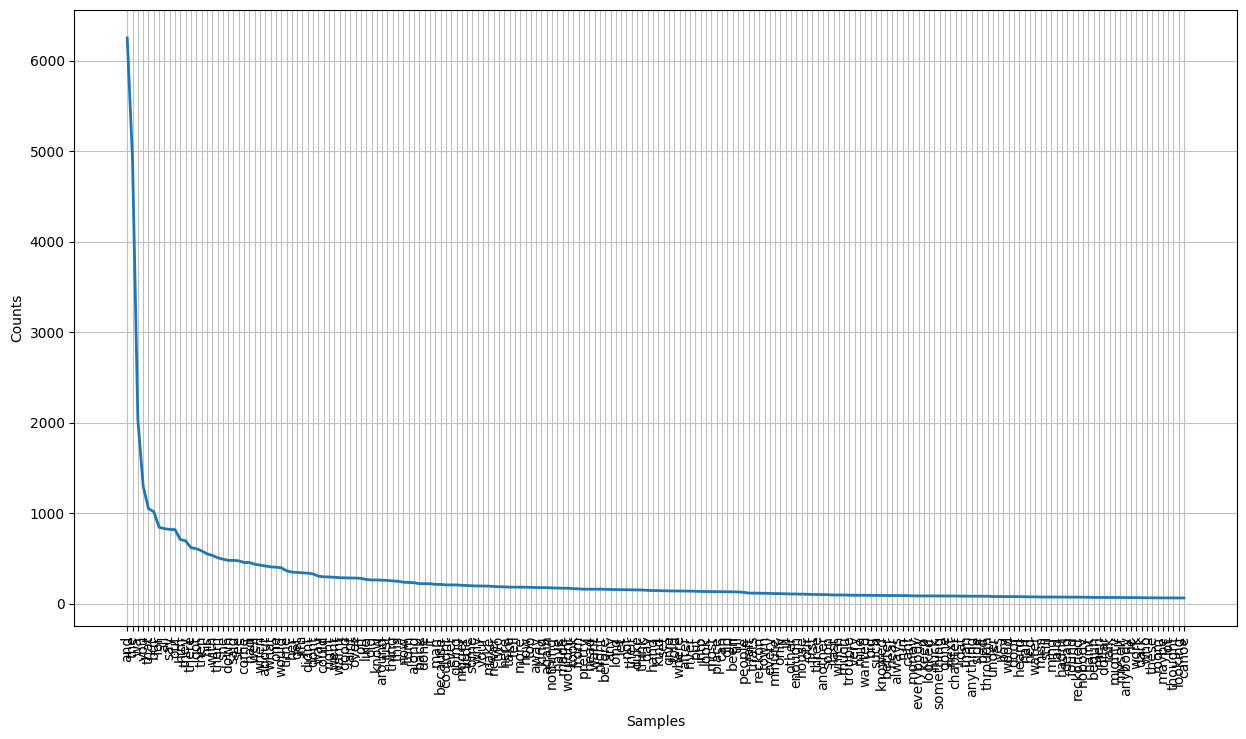

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:

plt.figure(figsize=(15, 8))
huckFreq.plot(200)


# Does the observed relative frequency of these words follow Zipf’s law? Explain.

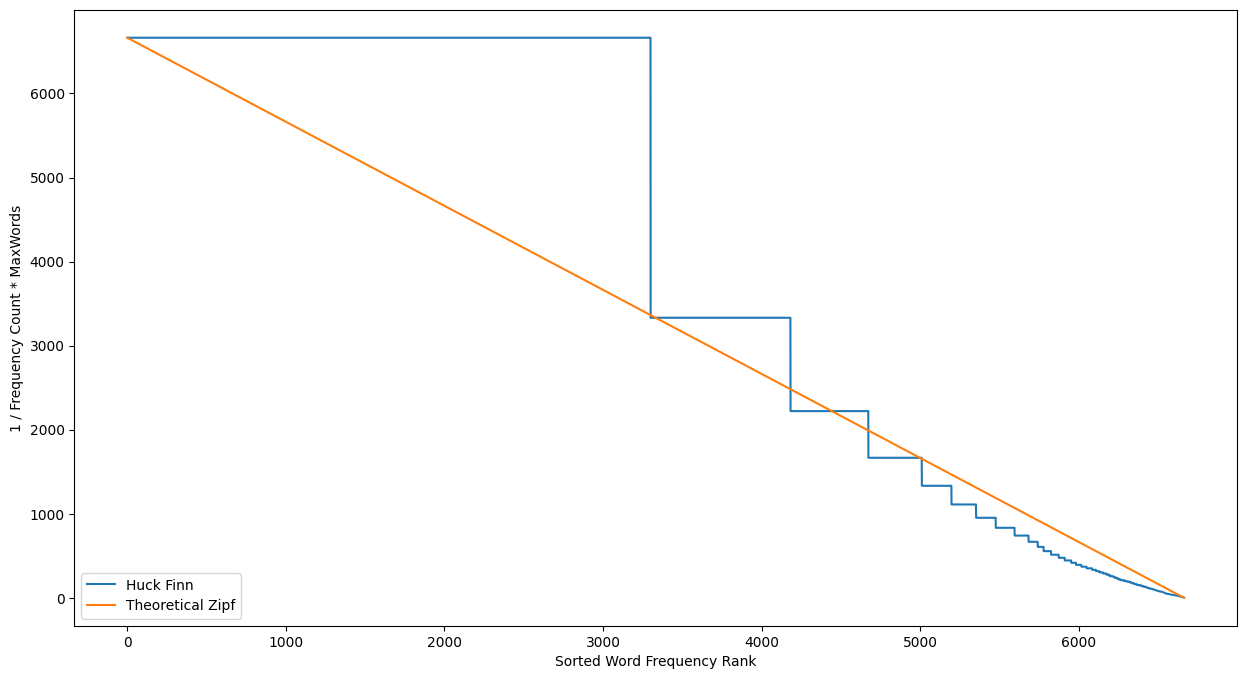

In [28]:
plt.figure(figsize=(15, 8))
vals = sorted(huckFreq.values())
inv = [1 / float(v) * uniqueWords for v in vals]
x = range(1, uniqueWords + 1)
theory = list(x[::-1])
plt.plot(x, inv)
plt.plot(theory)
plt.xlabel("Sorted Word Frequency Rank")
plt.ylabel("1 / Frequency Count * MaxWords")
plt.legend(['Huck Finn', 'Theoretical Zipf'], loc='lower left')

plt.show()


# In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [23]:
print("Since we see our text generally conforms to the theoretical Zipf's law, it is likely that our corpus is a reasonable representation of the larger population of 'all words in all corpora'.")

Since we see our text generally conforms to the theoretical Zipf's law, it is likely that our corpus is a reasonable representation of the larger population of 'all words in all corpora'.
